In [278]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [279]:
import numpy as np
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

%tensorflow_version 1.0.0
import tensorflow as tf
print(tf.__version__)

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.0.0`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
1.15.2


In [280]:
print("TensorFlow Version: %s" % tf.__version__)

TensorFlow Version: 1.15.2


In [281]:
import numpy as np
import tensorflow as tf
import math
import logging
logging.basicConfig(level=logging.DEBUG)
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [282]:
#Network parameters
n_hidden1 = 10
n_hidden2 = 10
n_input = 10
n_output = 1
#Learning parameters
learning_constant = 0.001
number_epochs = 10000
batch_size = 1000

In [283]:
#Defining the input and the output
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])
#DEFINING WEIGHTS AND BIASES
#Biases first hidden layer
b1 = tf.Variable(tf.random_normal([n_hidden1]))
#Biases second hidden layer
b2 = tf.Variable(tf.random_normal([n_hidden2]))
#Biases output layer
b3 = tf.Variable(tf.random_normal([n_output]))
#Weights connecting input layer with first hidden layer
w1 = tf.Variable(tf.random_normal([n_input, n_hidden1]))
#Weights connecting first hidden layer with second hidden layer
w2 = tf.Variable(tf.random_normal([n_hidden1, n_hidden2]))
#Weights connecting second hidden layer with output layer
w3 = tf.Variable(tf.random_normal([n_hidden2, n_output]))

In [284]:
# def multilayer_perceptron(input_d):
#   #Task of neurons of first hidden layer
#   layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(input_d, w1), b1))
#   #Task of neurons of second hidden layer
#   layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, w2), b2))
#   #Task of neurons of output layer
#   out_layer = tf.add(tf.matmul(layer_2, w3),b3)
#   return out_layer

def multilayer_perceptron(input_d):
  #Task of neurons of first hidden layer
  layer_1 = tf.nn.relu(tf.add(tf.matmul(input_d, w1), b1))
  #Task of neurons of second hidden layer
  layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, w2), b2))
  #Task of neurons of output layer
  out_layer = tf.add(tf.matmul(layer_2, w3),b3)
  return out_layer

In [285]:
#Create model
neural_network = multilayer_perceptron(X)

In [286]:
#Define loss and optimizer
loss_op = tf.reduce_mean(tf.math.squared_difference(neural_network,Y))
#loss_op =tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_network,labels=Y))
optimizer= tf.train.GradientDescentOptimizer(learning_constant).minimize(loss_op)

In [287]:
#Initializing the variables
init = tf.global_variables_initializer()

In [288]:
import numpy as np
import pandas as pd
import datetime

def PM2Dot5():
    path = '/content/drive/My Drive/Colab Notebooks/ML/PRSA_data_2010.1.1-2014.12.31.csv'
    # names = ['No','year','month','day','hour','pm2.5','DEWP','TEMP','PRES','cbwd','Iws','Is','Ir']
    df = pd.read_csv(path,index_col=False)

    # drop the rows directly -> mess up the order
    # first 24 rows have pm2.5 value that is NaN -> discard
    # else: forward filling
    df = df[24:].fillna(method='ffill')

    df['time'] = df.apply(lambda x : datetime.datetime(year=x['year'], month=x['month'], day=x['day'], hour=x['hour']), axis=1)
    df.drop(columns=['year', 'month', 'day', 'hour', 'No'], inplace=True)
    df = df.set_index('time')

    # one-hot encoding for attribute cbwd
    df = df.join(pd.get_dummies(df['cbwd']))
    del df['cbwd']


    X = df.iloc[:,1:].astype(np.float32)
    y = df['pm2.5'].astype(np.float32)

    return X, y.to_frame()



In [289]:
X_source,y_source = PM2Dot5()

X_train, X_test, y_train, y_test = train_test_split(X_source.values, y_source.values, test_size=0.4,shuffle=True)

In [290]:
y_train

array([[286.],
       [ 92.],
       [ 27.],
       ...,
       [112.],
       [ 91.],
       [ 29.]], dtype=float32)

In [291]:
# ## load MinMaxScaler
# from sklearn.preprocessing import MinMaxScaler
# scaler1 = MinMaxScaler(feature_range=(0,1))
# scaler = MinMaxScaler(feature_range=(0,1))
# X_train= scaler.fit_transform(X_train.astype(np.float32))
# X_test= scaler.transform(X_test.astype(np.float32))

# y_train= scaler1.fit_transform(y_train.astype(np.float32))
# y_test= scaler1.transform(y_test.astype(np.float32))

mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std # Use the mean & std of train. Since there's no way for us to know the future.

mean = y_train.mean(axis=0)
std = y_train.std(axis=0)
y_train = (y_train - mean) / std
y_test = (y_test - mean) / std # Use the mean & std of train. Since there's no way for us to know the future.

Epoch: 0   Loss = 77.44793
Epoch: 1000   Loss = 1.0508571
Epoch: 2000   Loss = 0.8580998
Epoch: 3000   Loss = 0.8030011
Epoch: 4000   Loss = 0.7775105
Epoch: 5000   Loss = 0.76276314
Epoch: 6000   Loss = 0.7530862
Epoch: 7000   Loss = 0.7462066
Epoch: 8000   Loss = 0.7409711
Epoch: 9000   Loss = 0.7368463
Accuracy: [4.3058538e+00 1.2111502e-03 4.0435502e-03 ... 6.8905149e-03 3.0324095e-01
 1.9978483e-04]
Prediction: [[ 0.0018997 ]
 [-0.09440653]
 [-0.8390515 ]
 ...
 [ 0.07764982]
 [ 0.48005503]
 [-0.7393017 ]]
Training time: 31


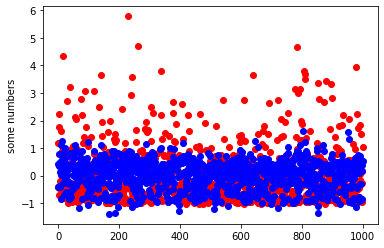

Average precison: 0.8412671


In [292]:
with tf.Session() as sess:
  start_time = time.clock()
  sess.run(init)
  #Training epoch
  for epoch in range(number_epochs):
    sess.run(optimizer, feed_dict={X: X_train, Y: y_train})
    #Display the epoch
    if epoch % 1000 == 0:
      print("Epoch:", '%d' % (epoch),' ','Loss = ' + str(sess.run(loss_op, feed_dict={X: X_train, Y: y_train})))
      # print("Epoch:", '%d' % (epoch))
      # print('Loss = ' + str(sess.run(loss_op, feed_dict={X: X_train, Y: y_train})))

  end_time = time.clock()
  # Test model
  pred = (neural_network) # Apply softmax to logits
  accuracy=tf.keras.losses.MSE(pred,Y)
  print("Accuracy:", accuracy.eval({X: X_train, Y:y_train}))

  print("Prediction:", pred.eval({X: X_train}))

  print("Training time:",'%d' % (end_time-start_time))
  output=neural_network.eval({X: X_test})
  plt.plot(y_test[0:1000], 'ro', output[0:1000], 'bo')
  plt.ylabel('some numbers')
  plt.show()
 
  estimated_class=tf.argmax(pred, 1)#+1e-50-1e-50
  correct_prediction1 = tf.equal(tf.argmax(pred, 1),y_test)
  accuracy1 = tf.reduce_mean(tf.cast(correct_prediction1, tf.float32))

  print("Average precison: " + str(accuracy1.eval({X: X_test})))